# Wind Turbine Power Production
###  Project assessment
#### [Machine Learning and Statistics Module GMIT 2020 ]

---

<img align="left" width="300" src="https://image.flaticon.com/icons/png/512/1778/1778210.png">
<br>

<br>

Lecturer: *Ian McLoughlin (https://github.com/ianmcloughlin)*

Completed by: *Olga Rozhdestvina (G00387844@gmit.ie)*

---

## Table of Contents

* [Overview](#overview)
* [General Setup](#setup)
* [Raw Data](#loading_data)
* [Data Pre-processing](#preproccesing)
    * [Outliners](#outliners)
    * [Creating Arrays for the Speed and the Power Variable](#arrays)
    * [Scaling](#scale)
    * [Creating the Training and Test Datasets](#split)
* [Build, Predict, and Evaluate the Models](#models)
    * [Linear Regression with Polynomial Features](#lr)
    * [Decision Tree](#dtree)
    * [Neural Networks](#nn)

<br>

### Overview. <a name="overview"></a>
___

Wind turbine power output is known for having a strong correlation with wind speed. In this work, three models (Linear Regression with Polynomial Features and Decision Tree using [scikit-learn](https://scikit-learn.org/stable/), and Neural Networks using [Tensorflow Keras](https://www.tensorflow.org/api_docs/python/tf/keras)) were built for predicting the turbine response for a given wind speed. The notebook also includes accuracy evaluation and its analysis for each model.

<br>

### General Setup. <a name="setup"></a>
___

In [1]:
# Neural networks.
import tensorflow.keras as kr

# Machine Learning 
import sklearn.linear_model as md
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

# Evaluation.
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt
# Another package for plotting.
import seaborn as sns

%matplotlib inline

In [2]:
# Theme for plots.
sns.set_theme(palette="Set2", context="paper", font_scale=1.5, )

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

<br>

### Raw Data. <a name="loading_data"></a>
___

> [1] [Adjusting Size of Seaborn Plot](https://stackoverflow.com/questions/51502927/adjusting-size-of-seaborn-plot)

In [3]:
# Load the iris data set from a URL.
df = pd.read_csv("powerproduction.csv")

# Display the data frame.
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


The data set has two numerical variables **speed** and **power**. They are both represented by real numbers: speed to 3 decimal points and power to one decimal point. Let's check if the data set has any empty values. 

In [4]:
# Check for empty values.
df.isnull().values.any()

False

In [5]:
# Stats.
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


The statistics found that the data is quite spread out. 

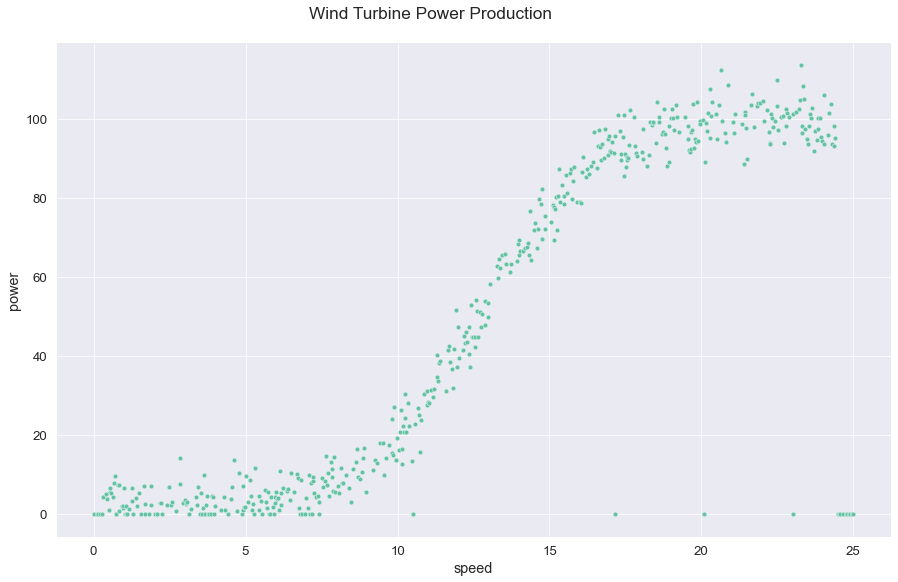

In [6]:
# Plot data.
sns.relplot(data=df, x="speed", y="power")

# Change plot size.
fig = plt.gcf()
fig.set_size_inches(14, 8)
fig.suptitle("Wind Turbine Power Production", y=1.02)

# Show the plot.
plt.show()

The above plot shows that the data follows a polynominal regression. The relationship between Power and Speed predominantly take "S"-shape. The power rises dramatically with speed over about 8 m/s and slows when the speed reaches about 17 m/s.

Additionally, we can see some outliners where the speed is above 10 m/s, however, the power is still 0.

<br>

###  Data Pre-processing. <a name="preproccesing"></a>
___

#### 1. Outliners.  <a name="outliners"></a>
The first step is to remove those outliners from our data set. [2] [3]

> [2] [Non-Linear Regression Trees with scikit-learn](https://www.pluralsight.com/guides/non-linear-regression-trees-scikit-learn)
<br>
[3] [Delete rows based on multiple conditions; including other column conditionals](https://stackoverflow.com/questions/31997992/delete-rows-based-on-multiple-conditions-including-other-column-conditionals)

In [7]:
# Remove outliners.
df_new = df.drop(df[(df.power == 0) & (df.speed > 5)].index)

# Display cleaned data set.
df_new

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


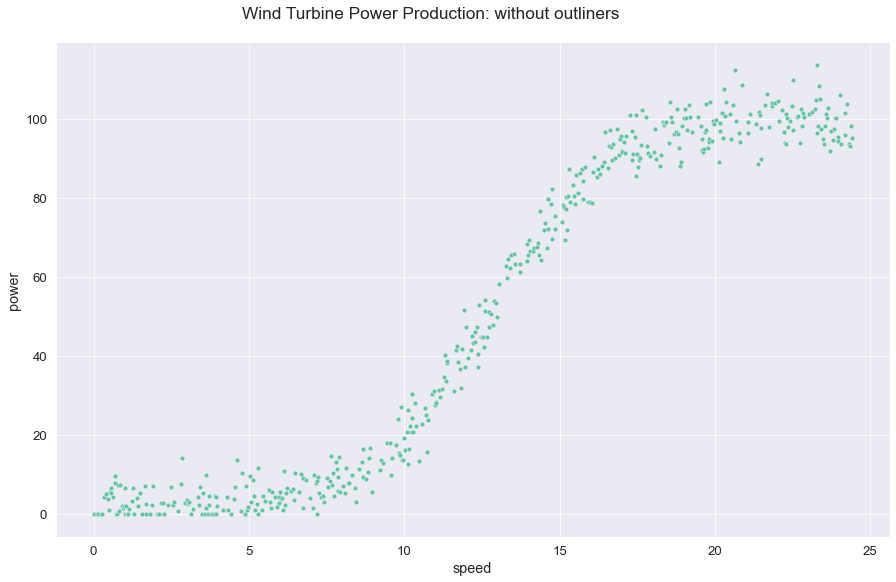

In [8]:
# Plot data.
sns.relplot(data=df_new, x="speed", y="power")

# Change plot size.
fig = plt.gcf()
fig.set_size_inches(14, 8)
fig.suptitle("Wind Turbine Power Production: without outliners", y=1.02)

# Show the plot.
plt.show()

<br>

#### 2. Creating Arrays for the Speed and the Power Variable.  <a name="arrays"></a>

Now the data set should be separated for speed and power values. 

In [9]:
# Separate speed and power.
speed = df_new.iloc[:, 0].values
power = df_new.iloc[:, 1].values

# Convert them into a numpy array.
X = np.array(speed).reshape(-1,1)
y = np.array(power).reshape(-1,1)

<br>

#### 3. Scaling. <a name="scale"></a>
Next we can scale our data. [5]

[5] [Compare the effect of different scalers on data with outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html)

In [10]:
# Create a instance of a scaler.
scaler = MinMaxScaler()

# Scale training and test data.
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

<br>

#### 4. Creating the Training and Test Datasets.  <a name="split"></a>

We will build our model on the training set and evaluate its performance on the test set. 

In [11]:
# Split data on training and test (add random state so the outputs are the same after each execution).
speed_train, speed_test, power_train, power_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Print shape of sets.
print(f"Training set: {speed_train.shape}, {power_train.shape}")
print(f"Test set: {speed_test.shape}, {power_test.shape}")

Training set: (333, 1), (333, 1)
Test set: (144, 1), (144, 1)


<br>

### Build, Predict, and Evaluate the Models. <a name="models"></a>

<br>

#### Linear Regression with Polynomial Features.  <a name="lr"></a>
___

<br>

Since we have Polynomial regression we can apply the first step is to apply polynomial features. In oder to do so we need first find the best fitting degree. [4]

>[4] [Polynomial interpolation](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html#sphx-glr-auto-examples-linear-model-plot-polynomial-interpolation-py)

In [12]:
degrees = []
# Find the best degree.
for degree in range(1,30):
    
    # Create a pipeline.
    pipeline = make_pipeline(PolynomialFeatures(degree), md.LinearRegression())
    # Fit it to the training data.
    pipeline.fit(speed_train, power_train)
    # Append score.
    degrees.append((degree, pipeline.score(speed_test,power_test)))

# Sort scores in the reverse order by the score. 
degrees.sort(key=lambda x:float(x[1]), reverse=True)

# Return only first 5 results.
for j in degrees[:5]:
    # Print results.
    print(f'{j}')

(22, 0.9906276015761861)
(23, 0.9906235363698063)
(21, 0.9906223734396851)
(24, 0.9906089040972884)
(25, 0.9905840147315644)


<br>
The results found that the degree 5 scores the best. Now we can create a model and fit it to our data. Additionally, we should calculate Mean Squared Error to evaluate the model. [5]

>[5] [Model evaluation: quantifying the quality of predictions](https://scikit-learn.org/0.15/modules/model_evaluation.html)

<br>

Now that we have the model created, we can fit it on the training data, make predictions on the test data and plot them. 

In [13]:
# Create a pipeline with 22 degrees.
pipeline = make_pipeline(PolynomialFeatures(22), md.LinearRegression())

# Fit the model on the training data.
pipeline.fit(speed_train, power_train)

# Predict power from traint and test speed.
y_train_pred = pipeline.predict(speed_train)
y_test_pred = pipeline.predict(speed_test)

# Calculate a score and mse.
print("TRAINING DATA\nCost: ", np.sqrt(mean_squared_error(power_train,y_train_pred)))
print("Score:", r2_score(power_train, y_train_pred))

print("\nTEST DATA\nCost: ", np.sqrt(mean_squared_error(power_test,y_test_pred)))
print("Score:", r2_score(power_test,y_test_pred))

TRAINING DATA
Cost:  0.03493901154771126
Score: 0.9906848033663184

TEST DATA
Cost:  0.03504919109569987
Score: 0.9906276015761861


In [14]:
power_test_unscaled = str(scaler.inverse_transform(power_test)[5])[1:-1] 
print(f"Actual power: {power_test_unscaled}")
print(f"Predicted power: {str(scaler.inverse_transform(y_test_pred)[5])[1:-1]}")

Actual power: 99.09
Predicted power: 96.35120033


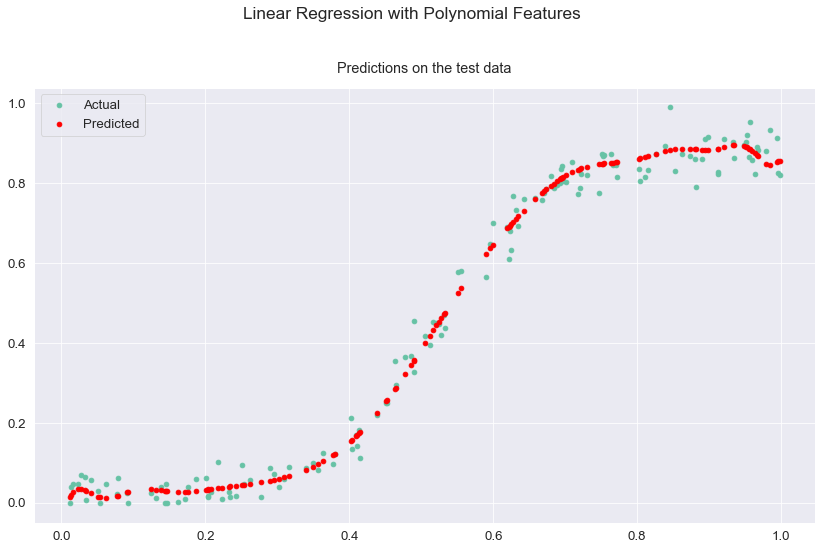

In [15]:
# Create a figure, axis and titles.
fig, ax = plt.subplots()
fig.suptitle("Linear Regression with Polynomial Features", y=1.02)
ax.set_title("Predictions on the test data",y=1.02)

# Plot actual test data and predictions.
ax.scatter(speed_test, power_test, label="Actual")
ax.scatter(speed_test, y_test_pred, c="red", label="Predicted")

# Show legend.
plt.legend(loc='upper left')

# Show the plot.
plt.show()

<br>

#### Decision Tree.  <a name="dtree"></a>
___


In [16]:
# Finding the best max_depth
depth = []

# Find the best depth.
for d in range(1,30):

    # Create a decision tree and fit it.
    df = DecisionTreeRegressor(max_depth=d, random_state=1)
    # Fit it to the train data.
    df.fit(speed_train, power_train)
    
    # Predict train and test speed.
    pred_train_tree= df.predict(speed_train)
    pred_test_tree = df.predict(speed_test)
    
    # Append stats to the list.
    depth.append((d, np.sqrt(mean_squared_error(power_train,pred_train_tree)),
                    r2_score(power_train, pred_train_tree),
                    np.sqrt(mean_squared_error(power_test,pred_test_tree)),
                    r2_score(power_test, pred_test_tree)))

# Sort the list in the reverse order by the score of test data. 
depth.sort(key=lambda x:float(x[4]), reverse=True)

# Return only first 5 results.
for j in depth[:5]:
    # Print results.
    print(f'Depth {j[0]}: {j[1:5]}')

Depth 5: (0.031321656108007856, 0.9925138205692745, 0.037984434082453576, 0.9889920597267922)
Depth 6: (0.0279944909801426, 0.9940197966955947, 0.03944660784875181, 0.9881282684085648)
Depth 4: (0.033649256667017055, 0.9913598407359276, 0.03978134876031001, 0.9879259282932045)
Depth 7: (0.025112189616395397, 0.9951878410708414, 0.04121827421183461, 0.9870379303120649)
Depth 8: (0.02160732660105462, 0.9964373523587261, 0.044231755883705544, 0.9850733240763359)


In [17]:
# Create a decision tree.
dtree = DecisionTreeRegressor(max_depth=5, random_state=1)
dtree.fit(speed_train, power_train)

# Predict train and test speed.
pred_train_tree= dtree.predict(speed_train)
pred_test_tree = dtree.predict(speed_test)

# Calculate a score and cost.
print("TRAINING DATA\nCost: ", np.sqrt(mean_squared_error(power_train,pred_train_tree)))
print("Score:", r2_score(power_train, pred_train_tree))
print("\nTEST DATA\nCost: ", np.sqrt(mean_squared_error(power_test,pred_test_tree)))
print("Score:", r2_score(power_test, pred_test_tree))

TRAINING DATA
Cost:  0.031321656108007856
Score: 0.9925138205692745

TEST DATA
Cost:  0.037984434082453576
Score: 0.9889920597267922


[] [GeeksForGeeks: Remove square brackets from list](https://www.geeksforgeeks.org/python-remove-square-brackets-from-list/)

In [18]:
pred_test_unscaled = str(scaler.inverse_transform(pred_test_tree.reshape(-1,1))[5])[1:-1]
print(f"Actual power: {power_test_unscaled}")
print(f"Predicted power: {pred_test_unscaled}")

Actual power: 99.09
Predicted power: 91.87883333


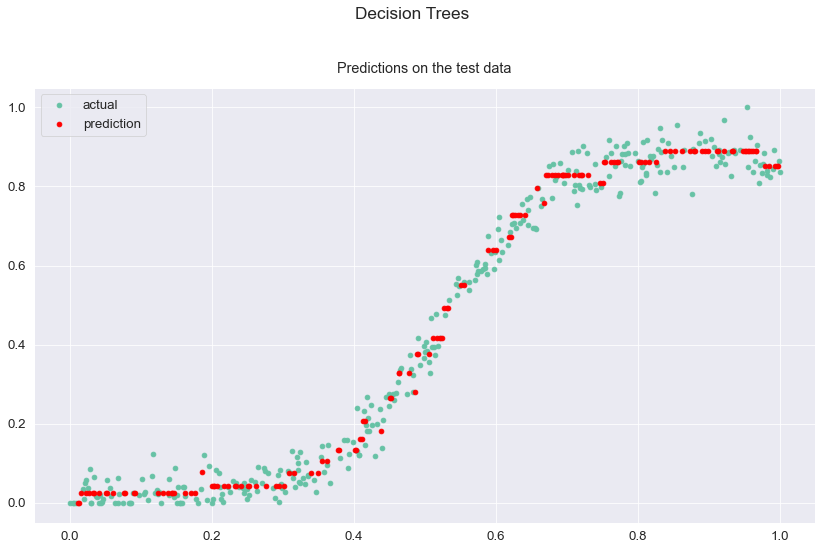

In [19]:
# Create a figure, axis and titles.
fig, ax = plt.subplots()
fig.suptitle("Decision Trees", y=1.02)
ax.set_title("Predictions on the test data",y=1.02)

# Plot actual test data and predictions.
ax.scatter(speed_train, power_train, label='actual')
ax.scatter(speed_test, pred_test_tree, label='prediction', c="r")

# Show the legend.
plt.legend()

# Show the plot.
plt.show()

<br>

#### Neural Networks.  <a name="nn"></a>
___

> [6] [Polynomial Regression using tf.keras](https://medium.com/@anigasan637/polynomial-regression-using-tf-keras-17eaac771256)
<br>
[7] [How to Control the Stability of Training Neural Networks With the Batch Size](https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/)
<br>
[8] [scikit-learn: how to scale back the 'y' predicted result](https://stackoverflow.com/questions/38058774/scikit-learn-how-to-scale-back-the-y-predicted-result)

[9] [How to get reproducible result when running Keras with Tensorflow backend](https://stackoverflow.com/questions/45230448/how-to-get-reproducible-result-when-running-keras-with-tensorflow-backend)

In [20]:
# Apply polynominal features
poly = PolynomialFeatures(22)
speed_train = poly.fit_transform(speed_train)
speed_test = poly.fit_transform(speed_test)

In [24]:
# Train a different model.
model = kr.models.Sequential()
model.add(kr.layers.Dense(45, input_shape=(23,), activation='relu', kernel_initializer=kr.initializers.RandomUniform(seed=1)))
model.add(kr.layers.Dense(3, input_shape=(23,), activation='sigmoid', kernel_initializer=kr.initializers.he_uniform(seed=1)))
model.add(kr.layers.Dense(1, activation='linear'))
model.compile(optimizer=kr.optimizers.Adam(0.01), loss='mse')

In [25]:
# Train the neural network on our training data.
model.fit(speed_train, power_train, epochs=300, batch_size=len(speed_train), validation_data=(speed_test, power_test))

Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 0.8241 - val_loss: 0.7450
Epoch 2/300
1/1 [==============================] - 0s 208ms/step - loss: 0.6865 - val_loss: 0.6111
Epoch 3/300
1/1 [==============================] - 1s 516ms/step - loss: 0.5666 - val_loss: 0.4954
Epoch 4/300
1/1 [==============================] - 0s 251ms/step - loss: 0.4617 - val_loss: 0.3972
Epoch 5/300
1/1 [==============================] - 0s 151ms/step - loss: 0.3710 - val_loss: 0.3158
Epoch 6/300
1/1 [==============================] - 0s 158ms/step - loss: 0.2946 - val_loss: 0.2498
Epoch 7/300
1/1 [==============================] - 0s 154ms/step - loss: 0.2321 - val_loss: 0.1974
Epoch 8/300
1/1 [==============================] - 0s 154ms/step - loss: 0.1823 - val_loss: 0.1571
Epoch 9/300
1/1 [==============================] - 0s 162ms/step - loss: 0.1442 - val_loss: 0.1271
Epoch 10/300
1/1 [==============================] - 0s 175ms/step - loss: 0.1163 - val_loss: 0.1058
Epoch 11/300

Epoch 83/300
1/1 [==============================] - 0s 233ms/step - loss: 0.0085 - val_loss: 0.0080
Epoch 84/300
1/1 [==============================] - 0s 484ms/step - loss: 0.0081 - val_loss: 0.0075
Epoch 85/300
1/1 [==============================] - 0s 261ms/step - loss: 0.0076 - val_loss: 0.0071
Epoch 86/300
1/1 [==============================] - 0s 271ms/step - loss: 0.0072 - val_loss: 0.0067
Epoch 87/300
1/1 [==============================] - 0s 232ms/step - loss: 0.0068 - val_loss: 0.0063
Epoch 88/300
1/1 [==============================] - 0s 148ms/step - loss: 0.0064 - val_loss: 0.0059
Epoch 89/300
1/1 [==============================] - 0s 162ms/step - loss: 0.0060 - val_loss: 0.0055
Epoch 90/300
1/1 [==============================] - 0s 155ms/step - loss: 0.0057 - val_loss: 0.0052
Epoch 91/300
1/1 [==============================] - 0s 136ms/step - loss: 0.0053 - val_loss: 0.0049
Epoch 92/300
1/1 [==============================] - 0s 237ms/step - loss: 0.0050 - val_loss: 0.0046


1/1 [==============================] - 0s 241ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 165/300
1/1 [==============================] - 0s 465ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 166/300
1/1 [==============================] - 0s 251ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 167/300
1/1 [==============================] - 0s 230ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 168/300
1/1 [==============================] - 0s 271ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 169/300
1/1 [==============================] - 0s 249ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 170/300
1/1 [==============================] - 0s 261ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 171/300
1/1 [==============================] - 0s 218ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 172/300
1/1 [==============================] - 0s 153ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 173/300
1/1 [==============================] - 0s 235ms/step - loss: 0.0015 - val_loss: 0.0014
Epoc

1/1 [==============================] - 0s 237ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 246/300
1/1 [==============================] - 1s 508ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 247/300
1/1 [==============================] - 0s 224ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 248/300
1/1 [==============================] - 0s 248ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 249/300
1/1 [==============================] - 0s 260ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 250/300
1/1 [==============================] - 0s 193ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 251/300
1/1 [==============================] - 0s 179ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 252/300
1/1 [==============================] - 0s 199ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 253/300
1/1 [==============================] - 0s 238ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 254/300
1/1 [==============================] - 0s 240ms/step - loss: 0.0013 - val_loss: 0.0013
Epoc

In [26]:
# Predict power for train and test data.
y_nn_train = model.predict(speed_train)
y_nn_test = model.predict(speed_test)

# Calculate a score and cost.
print("TRAINING DATA\nCost: ", np.sqrt(mean_squared_error(power_train,y_nn_train)))
print("Score:", r2_score(power_train, y_nn_train))

print("\nTEST DATA\nCost: ", np.sqrt(mean_squared_error(power_test,y_nn_test)))
print("Score:", r2_score(power_test,y_nn_test))

TRAINING DATA
Cost:  0.03607018158346093
Score: 0.9900718699934125

TEST DATA
Cost:  0.03514785887622841
Score: 0.9905747583938195


In [27]:
# Check actual and predicted wind power for the test speed 78.73383549
print(f"Actual power: {power_test_unscaled}")
print(f"Predicted power: {str(scaler.inverse_transform(y_nn_test)[5])[1:-1]}")

Actual power: 99.09
Predicted power: 97.11969


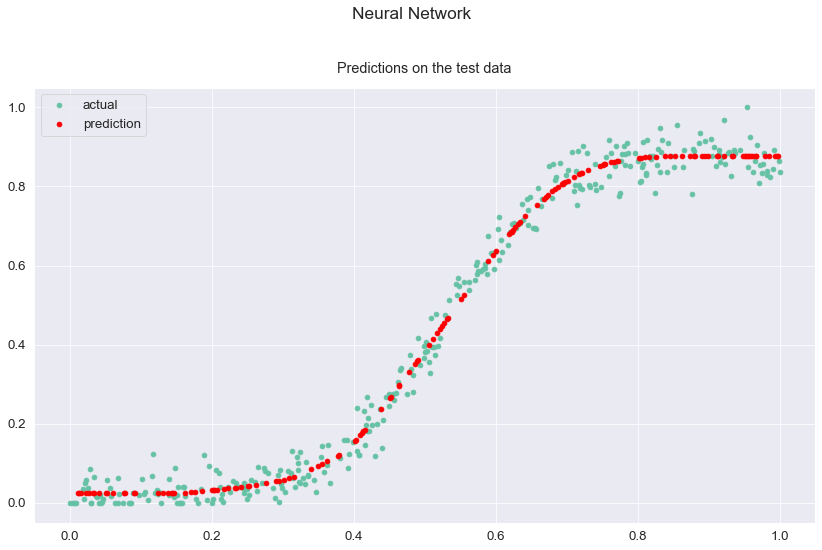

In [28]:
# Create a figure, axis and titles.
fig, ax = plt.subplots()
fig.suptitle("Neural Network", y=1.02)
ax.set_title("Predictions on the test data",y=1.02)

# Plot actual test data and predictions.
ax.scatter(speed_train[:, 1], power_train, label='actual')
ax.scatter(speed_test[:, 1], y_nn_test, label='prediction', c="r")

# Show the legend.
plt.legend()

# Show the plot.
plt.show()

___

<br>

### End.